In [ ]:
# Importing Libraries
!pip install --upgrade pip
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 1.5 MB 13.5 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 20.2.4
    Uninstalling pip-20.2.4:
      Successfully uninstalled pip-20.2.4


In [ ]:
df_raw = pd.read_csv("mental-heath-in-tech-2016_20161114.csv")
pd.set_option('display.max_columns', None)

renamed = ["Self Employed", "Total Employees", "Tech/No Tech", "Tech Role",
           "MH Benefits", "Awareness of Company MH Care", "Formal MH Discussion",
           "MH Resources", "Anonymity", "Medical Leave", "MH Negative Impact",
           "PH Negative Impact", "Telling Coworkers", "Telling Supervisors",
           "MH PH Equal", "Observed Negative Impact", "Medical Coverage",
           "Awareness of Local Resources", "Reveal Clients (If Diagnosed)",
           "Negative Impact (If Revealed Clients)", "Reveal Employees (If Diagnosed)", 
           "Negative Impact (If Revealed Employees)", "Affected Productivity",
           "% Affected", "Previous Employers", "Prev MH Benefits", "Prev Awareness of Company MH Care",
           "Prev Formal MH Discussion", "Prev MH Resources", "Prev Anonymity",
           "Prev MH Negative Impact", "Prev PH Negative Impact", "Prev Telling Coworkers",
           "Prev Telling Supervisors", "Prev MH PH Equal", "Prev Observed Negative Impact",
           "PH Potential Employer", "PH Why/Not", "MH Potential Employer", "MH Why/Not",
           "MH Identification Career Harm", "Negative Impact Coworkers", "Sharing w/ Family/Friends",
           "Prev Observed Unsupportive Response", "Less Likely to Reveal", "MH Family History",
           "Past Mental Disorder", "Current Mental Disorder", "Condition", "Maybe Condition",
           "Professional Diagnosis", "Diagnosis", "Sought Treatment",
           "MH Interference Treatment", "MH Interference No Treatment", "Age",
           "Gender", "Country Live", "State Live", "Country", "State", "Position", "Remote"]
df_raw.columns = renamed
df_raw.head()


,Self Employed,Total Employees,Tech/No Tech,Tech Role,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,PH Negative Impact,Telling Coworkers,Telling Supervisors,MH PH Equal,Observed Negative Impact,Medical Coverage,Awareness of Local Resources,Reveal Clients (If Diagnosed),Negative Impact (If Revealed Clients),Reveal Employees (If Diagnosed),Negative Impact (If Revealed Employees),Affected Productivity,% Affected,Previous Employers,Prev MH Benefits,Prev Awareness of Company MH Care,Prev Formal MH Discussion,Prev MH Resources,Prev Anonymity,Prev MH Negative Impact,Prev PH Negative Impact,Prev Telling Coworkers,Prev Telling Supervisors,Prev MH PH Equal,Prev Observed Negative Impact,PH Potential Employer,PH Why/Not,MH Potential Employer,MH Why/Not,MH Identification Career Harm,Negative Impact Coworkers,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Past Mental Disorder,Current Mental Disorder,Condition,Maybe Condition,Professional Diagnosis,Diagnosis,Sought Treatment,MH Interference Treatment,MH Interference No Treatment,Age,Gender,Country Live,State Live,Country,State,Position,Remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,NaN,Maybe,NaN,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,It would depend on the health issue. If there ...,No,While mental health has become a more prominen...,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,"They would provable need to know, to Judge if ...",Yes,"Stigma, mainly.",Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,NaN,No,NaN,1,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"Yes, I know several","Sometimes, if it comes up",I'm not sure,"Sometimes, if it comes up",I'm not sure,Yes,1-25%,1,Some did,N/A (not currently aware),None did,None did,I don't know,Some of them,Some of them,Some of my previous employers,Some of my previous employers,I don't know,Some of them,Yes,"old back injury, doesn't cause me many issues ...",Maybe,would not if I was not 100% sure that the disc...,"Yes, I think it would",Maybe,Neutral,No,NaN,No,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,NaN,NaN,NaN,NaN,Na

In [ ]:
df_without_NaN = df_raw.copy().dropna(subset=["Age"])
mean_age = df_without_NaN.mean()["Age"]

df_raw.loc[df_raw["Age"] < 13, "Age"] = mean_age #filling wrong values with mean age
df_raw.loc[df_raw["Age"] > 72, "Age"] = mean_age #filling wrong values with mean age
df_raw[['Age']].head()

,Age
0,39.0
1,29.0
2,38.0
3,43.0
4,43.0


In [ ]:
# Load data
df_current = pd.read_csv("mental_health_tech_current.csv", index_col=0).drop(columns=["Self Employed"])
df_current['Age_int'] =df_raw['Age']
df_current.head()

,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,PH Negative Impact,Telling Coworkers,Telling Supervisors,MH PH Equal,Observed Negative Impact,Previous Employers,Prev MH Benefits,Prev Awareness of Company MH Care,Prev Formal MH Discussion,Prev MH Resources,Prev Anonymity,Prev MH Negative Impact,Prev PH Negative Impact,Prev Telling Coworkers,Prev Telling Supervisors,Prev MH PH Equal,Prev Observed Negative Impact,PH Potential Employer,MH Potential Employer,MH Identification Career Harm,Negative Impact Coworkers,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Past Mental Disorder,Current Mental Disorder,Condition,Professional Diagnosis,Diagnosis,Sought Treatment,Age,Gender,Country,State,Remote,Age_int
0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,No,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,4,1.0,2,0,Sometimes,39.0
1,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,3,1.0,1,2,Never,29.0
2,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,No,NaN,No,NaN,1,4,1.0,2,0,Always,38.0
4,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,4,2.0,1,2,Sometimes,43.0
5,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,Maybe,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,No,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",No,NaN,1,4,1.0,2,0,Sometimes,42.0


In [ ]:
df_current.loc[df_current["Current Mental Disorder"] == 'Yes', "Current Mental Disorder"] = 1
df_current.loc[df_current["Current Mental Disorder"] == 'Maybe', "Current Mental Disorder"] = 0.5
df_current.loc[df_current["Current Mental Disorder"] == 'No', "Current Mental Disorder"] = 0

In [ ]:
yes_no_current = df_current[df_current['Current Mental Disorder'] != 0.5]
yes_no_current

,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,PH Negative Impact,Telling Coworkers,Telling Supervisors,MH PH Equal,Observed Negative Impact,Previous Employers,Prev MH Benefits,Prev Awareness of Company MH Care,Prev Formal MH Discussion,Prev MH Resources,Prev Anonymity,Prev MH Negative Impact,Prev PH Negative Impact,Prev Telling Coworkers,Prev Telling Supervisors,Prev MH PH Equal,Prev Observed Negative Impact,PH Potential Employer,MH Potential Employer,MH Identification Career Harm,Negative Impact Coworkers,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Past Mental Disorder,Current Mental Disorder,Condition,Professional Diagnosis,Diagnosis,Sought Treatment,Age,Gender,Country,State,Remote,Age_int
0,3,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,Maybe,Yes,I don't know,No,1,"No, none did",N/A (not currently aware),I don't know,None did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,I don't know,None of them,Maybe,Maybe,Maybe,"No, I don't think they would",Somewhat open,No,NaN,No,Yes,0,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",0,4,1.0,2,0,Sometimes,39.0
1,2,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,Yes,No,1,"Yes, they all did",I was aware of some,None did,Some did,"Yes, always",None of them,None of them,"No, at none of my previous employers",Some of my previous employers,Some did,None of them,Maybe,No,"No, I don't think it would","No, I don't think they would",Somewhat open,No,NaN,Yes,Yes,1,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,3,1.0,1,2,Never,29.0
2,2,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,"No, none did",N/A (not currently aware),None did,Some did,I don't know,I don't know,Some of them,Some of my previous employers,I don't know,I don't know,Some of them,Yes,Yes,Maybe,Maybe,Somewhat open,Maybe/Not sure,Yes,No,Maybe,0,NaN,No,NaN,1,4,1.0,2,0,Always,38.0
4,2,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,No,No,1,I don't know,N/A (not currently aware),Some did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers",Some of my previous employers,Some did,Some of them,Maybe,No,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,1,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,4,2.0,1,2,Sometimes,43.0
5,6,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,No,Yes,1,"No, none did","Yes, I was aware of all of them",None did,None did,I don't know,"Yes, all of them",Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Yes,Maybe,"Yes, I think it would",Maybe,Somewhat open,"Yes, I experienced",No,No,No,1,"Anxiety Disorder (Generalized, Social, Phobia,...",No,NaN,1,4,1.0,2,0,Sometimes,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,4,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Somewhat difficult,Maybe,No,Maybe,Maybe,I don't know,No,1,I don't know,N/A (not currently aware),Some did,Some did,I don't know,Some of them,None of them,Some of my previous employers,Some of my previous employers,Some did,None of them,Maybe,Maybe,"Yes, I think it would","Yes, I think they would",Somewhat open,Maybe/Not sure,No,I don't know,Yes,1,"Anxiety Disorder (Generalized, Social, Phobia,...",Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",1,2,2.0,3,0,Sometimes,22.0
1426,4,1.0,I don't know,I am not sure,No,I don't know,I don't know,Somewhat easy,Maybe,No,Maybe,Maybe,I don't know,No,1,I don't know,N/A 

In [ ]:
yes_no_current.loc['No Treatment & No Disorder'] = 0
bool_arr_no_no = [yes_no_current['Current Mental Disorder'] == 0] and yes_no_current["Sought Treatment"] == 0 
yes_no_current.loc[bool_arr_no_no, 'No Treatment & No Disorder'] = 1
len(yes_no_current[yes_no_current['No Treatment & No Disorder'] == 1])

/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/venv/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

377

In [ ]:
disorder_yes[0] & treatment_no[0]

0                             False
1                             False
2                             False
4                             False
5                             False
                              ...  
1426                          False
1427                          False
1431                           True
1432                           True
No Treatment & No Disorder    False
Length: 890, dtype: bool

In [ ]:
# 890 items yes/no for current column
disorder_no = [yes_no_current['Current Mental Disorder'] == 0]
disorder_yes = [yes_no_current['Current Mental Disorder'] == 1]
treatment_no = [yes_no_current["Sought Treatment"] == 0 ]
treatment_yes = [yes_no_current["Sought Treatment"] == 1 ]

# 1. disorder 2. treatment
bool_arr_no_no = np.array(disorder_no[0] & treatment_no[0])
bool_arr_yes_no = np.array(disorder_yes[0] & treatment_no[0])
bool_arr_no_yes = np.array(disorder_no[0] & treatment_yes[0])
bool_arr_yes_yes = np.array(disorder_yes[0] & treatment_yes[0])

yes_no_current['No Disorder & No Treatment'] = bool_arr_no_no
yes_no_current['Disorder, but No Treatment'] = bool_arr_yes_no
yes_no_current['No Disorder, but Treatment'] = bool_arr_no_yes
yes_no_current['Disorder & Treatment'] = bool_arr_yes_yes

yes_no_current['D & T (categories)'] = "NA"
yes_no_current.loc[bool_arr_no_no,'D & T (categories)'] = 'No Disorder & No Treatment'
yes_no_current.loc[bool_arr_yes_no,'D & T (categories)'] = 'Disorder, but No Treatment'
yes_no_current.loc[bool_arr_no_yes,'D & T (categories)'] = 'No Disorder, but Treatment'
yes_no_current.loc[bool_arr_yes_yes,'D & T (categories)'] = 'Disorder & Treatment'

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
yes_no_current[['D & T (categories)']]

,D & T (categories)
0,No Disorder & No Treatment
1,Disorder & Treatment
2,"No Disorder, but Treatment"
4,Disorder & Treatment
5,Disorder & Treatment
...,...
1426,Disorder & Treatment
1427,Disorder & Treatment
1431,"Disorder, but No Treatment"
1432,"Disorder, but No Treatment"


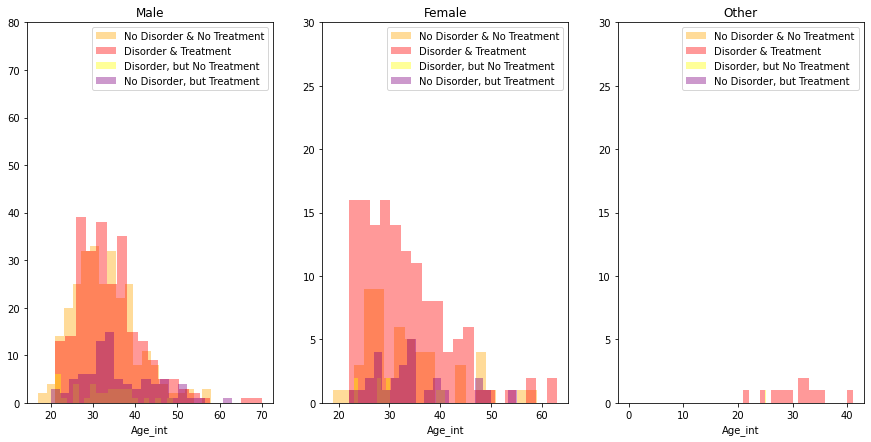

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 7))
male = yes_no_current[yes_no_current["Gender"]==1]
female = yes_no_current[yes_no_current["Gender"]==2]
other = yes_no_current[yes_no_current["Gender"]==3]

#graph male mental disorder
ax = sns.distplot(male[male["No Disorder & No Treatment"]==True]["Age_int"].dropna(), bins=20, label = 'No Disorder & No Treatment',  ax=axes[0], kde=False, color="orange")
ax = sns.distplot(male[male['Disorder & Treatment']==True]["Age_int"].dropna(), bins=20, label = "Disorder & Treatment", ax=axes[0], kde=False, color="red")
ax = sns.distplot(male[male['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[0], kde=False, color="yellow")
ax = sns.distplot(male[male['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[0], kde=False, color="purple")
ax.set(ylim=(0, 80))
ax.legend()
ax.set_title("Male")

#graph female mental disorder
ax = sns.distplot(female[female["No Disorder & No Treatment"]==True]["Age_int"].dropna(), bins=20, label = "No Disorder & No Treatment",  ax=axes[1], kde=False, color="orange")
ax = sns.distplot(female[female["Disorder & Treatment"]==True]["Age_int"].dropna(), bins=20, label = "Disorder & Treatment", ax=axes[1], kde=False, color="red")
ax = sns.distplot(female[female['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[1], kde=False, color="yellow")
ax = sns.distplot(female[female['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[1], kde=False, color="purple")
ax.set(ylim=(0, 30))
ax.legend()
ax.set_title("Female")

# #graph other mental disorder
ax = sns.distplot(other[other["No Disorder & No Treatment"]==True]["Age_int"].dropna(), bins=20, label = "No Disorder & No Treatment",  ax=axes[2], kde=False, color="orange")
ax = sns.distplot(other[other["Disorder & Treatment"]==True]["Age_int"].dropna(), bins=20, label = "Disorder & Treatment", ax=axes[2], kde=False, color="red")
ax = sns.distplot(other[other['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[2], kde=False, color="yellow")
ax = sns.distplot(other[other['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[2], kde=False, color="purple")
ax.set(ylim=(0, 30))
ax.legend()
ax.set_title("Other");

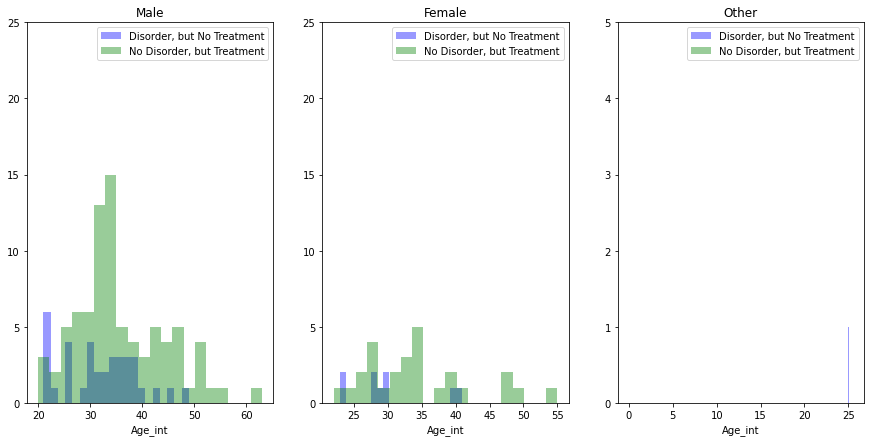

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 7))
male = yes_no_current[yes_no_current["Gender"]==1]
female = yes_no_current[yes_no_current["Gender"]==2]
other = yes_no_current[yes_no_current["Gender"]==3]

# graph male mental disorder
ax = sns.distplot(male[male['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[0], kde=False, color="blue")
ax = sns.distplot(male[male['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[0], kde=False, color="green")
ax.set(ylim=(0, 25))
ax.legend()
ax.set_title("Male")

# graph female mental disorder
ax = sns.distplot(female[female['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[1], kde=False, color="blue")
ax = sns.distplot(female[female['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[1], kde=False, color="green")
ax.set(ylim=(0, 25))
ax.legend()
ax.set_title("Female")

# graph other mental disorder
ax = sns.distplot(other[other['Disorder, but No Treatment']==True]["Age_int"].dropna(), bins=20, label = 'Disorder, but No Treatment', ax=axes[2], kde=False, color="blue")
ax = sns.distplot(other[other['No Disorder, but Treatment']==True]["Age_int"].dropna(), bins=20, label = 'No Disorder, but Treatment', ax=axes[2], kde=False, color="green")
ax.set(ylim=(0, 5))
ax.legend()
ax.set_title("Other");

In [ ]:
## Maybe's
maybe_current = df_current[df_current['Current Mental Disorder'] == 0.5]
maybe_current.head()


,Total Employees,Tech/No Tech,MH Benefits,Awareness of Company MH Care,Formal MH Discussion,MH Resources,Anonymity,Medical Leave,MH Negative Impact,PH Negative Impact,Telling Coworkers,Telling Supervisors,MH PH Equal,Observed Negative Impact,Previous Employers,Prev MH Benefits,Prev Awareness of Company MH Care,Prev Formal MH Discussion,Prev MH Resources,Prev Anonymity,Prev MH Negative Impact,Prev PH Negative Impact,Prev Telling Coworkers,Prev Telling Supervisors,Prev MH PH Equal,Prev Observed Negative Impact,PH Potential Employer,MH Potential Employer,MH Identification Career Harm,Negative Impact Coworkers,Sharing w/ Family/Friends,Prev Observed Unsupportive Response,Less Likely to Reveal,MH Family History,Past Mental Disorder,Current Mental Disorder,Condition,Professional Diagnosis,Diagnosis,Sought Treatment,Age,Gender,Country,State,Remote,Age_int
13,4,0.0,Yes,Yes,Yes,Yes,Yes,Somewhat easy,No,No,No,Maybe,Yes,No,1,I don't know,N/A (not currently aware),None did,None did,I don't know,"Yes, all of them","Yes, all of them",Some of my previous employers,Some of my previous employers,None did,Some of them,Yes,No,Maybe,"Yes, I think they would",Not open at all,"Yes, I experienced",Maybe,No,Maybe,0.5,NaN,No,NaN,0,4,1.0,3,0,Sometimes,44.0
27,4,1.0,I don't know,No,No,No,I don't know,Somewhat difficult,No,No,No,No,I don't know,No,1,"No, none did",N/A (not currently aware),None did,None did,I don't know,I don't know,Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,Some of them,Maybe,No,"Yes, I think it would","Yes, I think they would",Somewhat not open,Maybe/Not sure,No,No,No,0.5,NaN,No,NaN,1,3,1.0,4,0,Never,35.0
28,5,0.0,I don't know,No,Yes,Yes,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,I don't know,Yes,1,I don't know,"No, I only became aware later",None did,None did,I don't know,Some of them,Some of them,"No, at none of my previous employers","No, at none of my previous employers",None did,"Yes, all of them",Maybe,No,"Yes, I think it would","No, I don't think they would",Neutral,"Yes, I observed",Yes,Yes,Yes,0.5,NaN,No,NaN,1,3,2.0,2,0,Never,34.0
32,6,1.0,I don't know,I am not sure,No,No,I don't know,Very easy,Maybe,No,No,Maybe,No,No,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Maybe,Maybe,Somewhat open,No,NaN,I don't know,Yes,0.5,NaN,No,NaN,0,3,1.0,1,2,Never,31.0
37,4,1.0,No,Yes,No,No,I don't know,Somewhat easy,No,No,Yes,Yes,Yes,No,1,"No, none did","Yes, I was aware of all of them",None did,None did,No,Some of them,None of them,Some of my previous employers,Some of my previous employers,None did,"Yes, all of them",Maybe,Maybe,Maybe,"Yes, I think they would",Somewhat open,"Yes, I observed",Yes,No,No,0.5,NaN,No,NaN,0,3,1.0,2,0,Never,29.0


In [ ]:
maybe_treatments = maybe_current.groupby(['Gender', 'Sought Treatment']).count().reset_index()[['Gender', "Sought Treatment", 'Total Employees']]
maybe_treatments

#each column is a bar
stacked_df = pd.pivot_table(maybe_current[['Gender', "Sought Treatment", 'Total Employees']], index=["Gender"], columns="Sought Treatment", values='Total Employees', aggfunc=len)
stacked_df

Sought Treatment,0,1
Gender,,
1.0,100,102
2.0,12,32
3.0,1,7


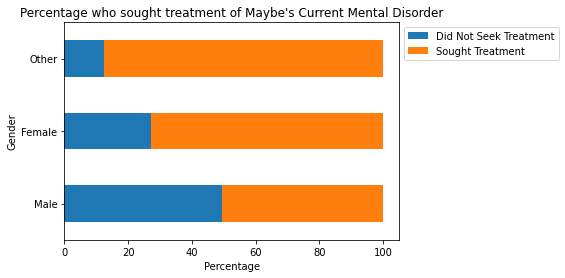

In [ ]:
stacked_data = stacked_df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot.barh(stacked=True);
plt.legend(bbox_to_anchor=[1, 1], labels=['Did Not Seek Treatment', 'Sought Treatment']);
plt.yticks(np.arange(3), ["Male", "Female", 'Other'])
plt.xlabel("Percentage");
plt.title("Percentage who sought treatment of Maybe's Current Mental Disorder");

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=387b3f34-ad6b-4fed-8016-3e4e46161261' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>